In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/calvi/Downloads/archive (4)/amazon_products_sales_data_cleaned.csv')

In [4]:
use_cols = [
    "discounted_price", "original_price", "discount_percentage",
    "product_rating", "total_reviews", "product_category"
]
df = df[use_cols].copy()

# convert to numeric where needed
for c in ["discounted_price","original_price","discount_percentage","product_rating","total_reviews"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df["product_category"] = df["product_category"].astype(str).str.strip()

df = df.dropna(subset=["discounted_price","product_rating","total_reviews","product_category"])
df.shape


(39590, 6)

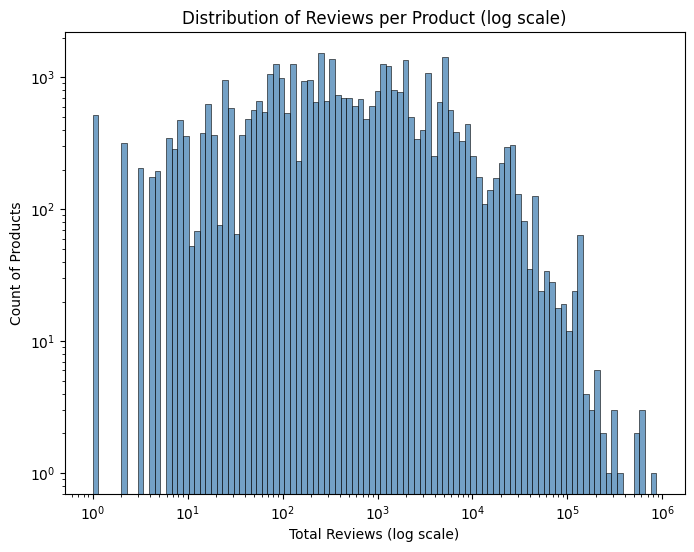

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df["total_reviews"], bins=100, log_scale=(True, True), color="steelblue")
plt.title("Distribution of Reviews per Product (log scale)")
plt.xlabel("Total Reviews (log scale)")
plt.ylabel("Count of Products")
plt.show()

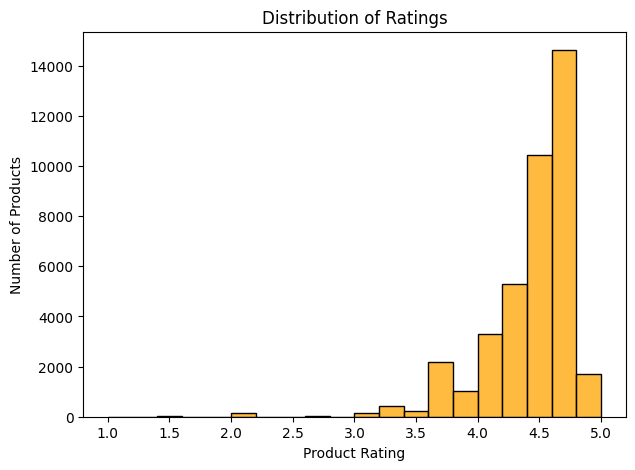

In [6]:
plt.figure(figsize=(7,5))
sns.histplot(df["product_rating"], bins=20, kde=False, color="orange")
plt.title("Distribution of Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Number of Products")
plt.show()


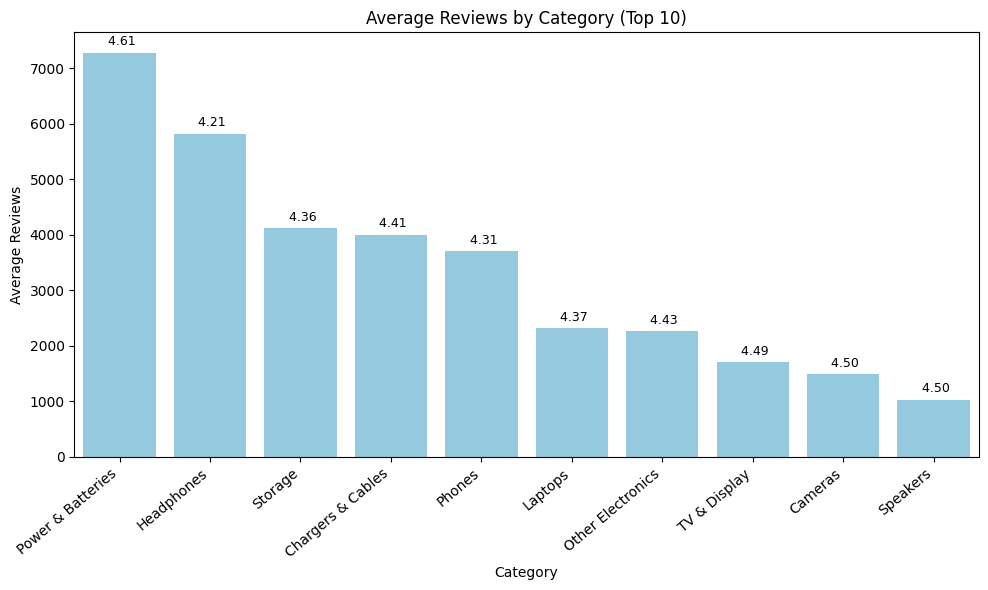

In [12]:
top_cats = df["product_category"].value_counts().head(10).index
g = df[df["product_category"].isin(top_cats)].copy()

cat_stats = g.groupby("product_category").agg(
    avg_reviews=("total_reviews","mean"),
    avg_rating=("product_rating","mean"),
    n=("product_category","size")
).sort_values("avg_reviews", ascending=False)

plt.figure(figsize=(10,6))
ax = sns.barplot(x=cat_stats.index, y=cat_stats["avg_reviews"], color="skyblue")
ax.set_title("Average Reviews by Category (Top 10)")
ax.set_xlabel("Category")
ax.set_ylabel("Average Reviews")

plt.xticks(rotation=40, ha="right")

for p, r in zip(ax.patches, cat_stats["avg_rating"].tolist()):
    ax.annotate(f" {r:.2f}", 
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9,
                xytext=(0,3), textcoords="offset points")

plt.tight_layout()
plt.show()


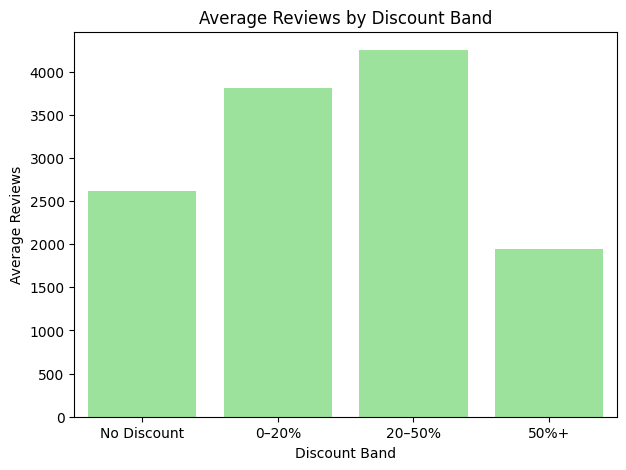

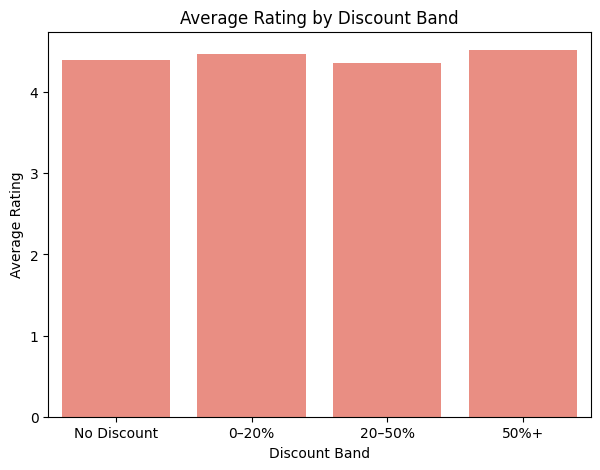

In [8]:
# create discount bands
bins = [-1,0,20,50,100]
labels = ["No Discount","0–20%","20–50%","50%+"]
df["discount_band"] = pd.cut(df["discount_percentage"], bins=bins, labels=labels)

disc_stats = df.groupby("discount_band").agg(
    avg_reviews=("total_reviews","mean"),
    avg_rating=("product_rating","mean"),
    n=("discount_band","size")
)

plt.figure(figsize=(7,5))
ax = sns.barplot(x=disc_stats.index, y=disc_stats["avg_reviews"], color="lightgreen")
ax.set_title("Average Reviews by Discount Band")
ax.set_xlabel("Discount Band")
ax.set_ylabel("Average Reviews")
plt.show()

plt.figure(figsize=(7,5))
ax = sns.barplot(x=disc_stats.index, y=disc_stats["avg_rating"], color="salmon")
ax.set_title("Average Rating by Discount Band")
ax.set_xlabel("Discount Band")
ax.set_ylabel("Average Rating")
plt.show()



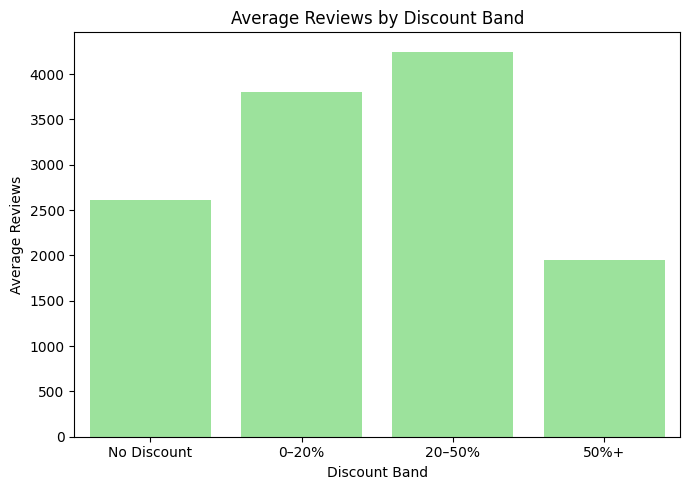

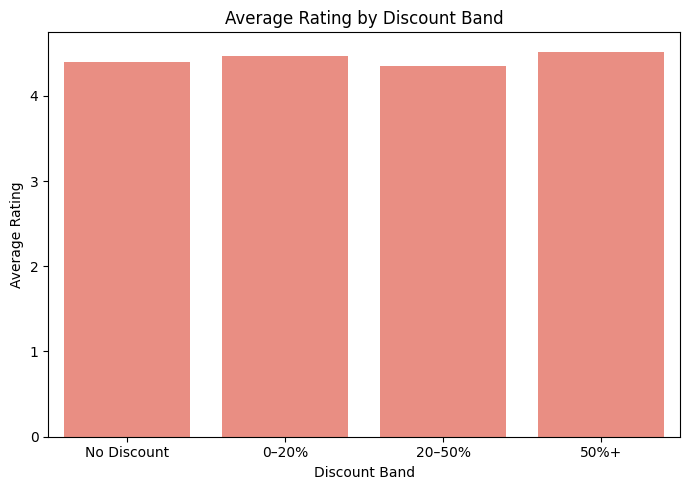

In [11]:
# create discount bands
bins = [-1,0,20,50,100]
labels = ["No Discount","0–20%","20–50%","50%+"]
df["discount_band"] = pd.cut(df["discount_percentage"], bins=bins, labels=labels)

disc_stats = df.groupby("discount_band").agg(
    avg_reviews=("total_reviews","mean"),
    avg_rating=("product_rating","mean"),
    n=("discount_band","size")
)

plt.figure(figsize=(7,5))
ax = sns.barplot(x=disc_stats.index, y=disc_stats["avg_reviews"], color="lightgreen")
ax.set_title("Average Reviews by Discount Band")
ax.set_xlabel("Discount Band")
ax.set_ylabel("Average Reviews")
plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
ax = sns.barplot(x=disc_stats.index, y=disc_stats["avg_rating"], color="salmon")
ax.set_title("Average Rating by Discount Band")
ax.set_xlabel("Discount Band")
ax.set_ylabel("Average Rating")
plt.xticks(rotation=0, ha="center")
plt.tight_layout()
plt.show()

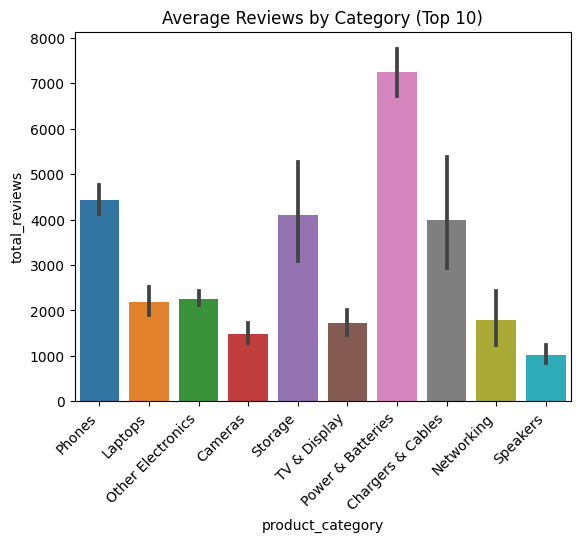

In [29]:
top_cats = df[COL_CAT].value_counts().head(10).index
g = df[df[COL_CAT].isin(top_cats)]

sns.barplot(data=g, x=COL_CAT, y=COL_REVIEWS, estimator="mean")
plt.xticks(rotation=45, ha="right")
plt.title("Average Reviews by Category (Top 10)")
plt.show()


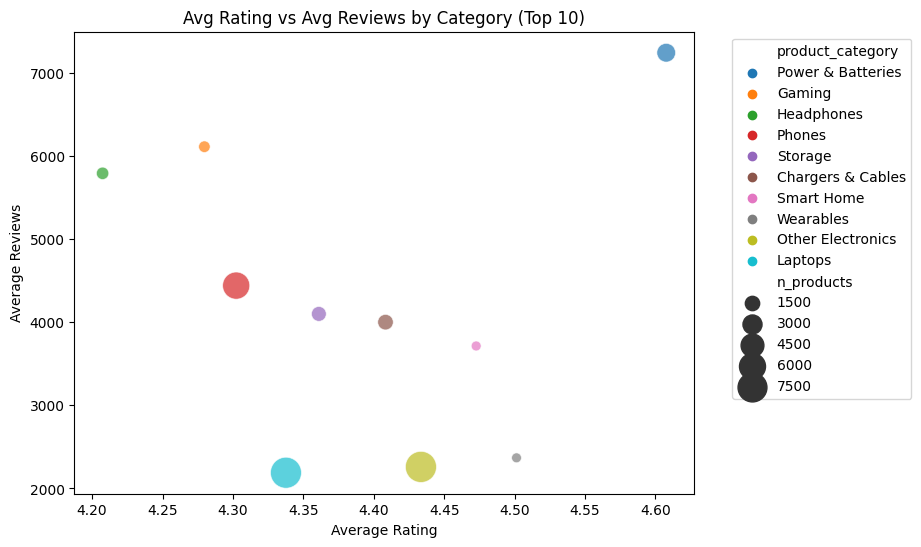

In [30]:
cat_stats = df.groupby("product_category").agg(
    avg_reviews=("total_reviews", "mean"),
    avg_rating=("product_rating", "mean"),
    n_products=("product_title", "count")
).reset_index()

top_cats = cat_stats.nlargest(10, "avg_reviews")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=top_cats,
    x="avg_rating",
    y="avg_reviews",
    size="n_products",
    hue="product_category",
    alpha=0.7,
    sizes=(50, 500)
)
plt.title("Avg Rating vs Avg Reviews by Category (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("Average Reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


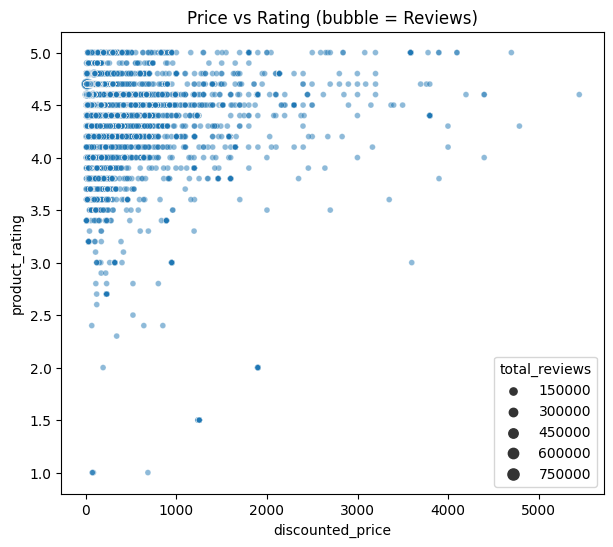

In [22]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x=COL_PRICE,
    y=COL_RATING,
    size=COL_REVIEWS,
    alpha=0.5
)
plt.title("Price vs Rating (bubble = Reviews)")
plt.show()
